# TensorFlow 2.0 Project - Predicting Loan Repayment
# Part II-Bis: Test Models
### A. J. Zerouali 2021/09/09

* This is the project in Section 25 of Pierian Data's DSML course. It's covered (with solutions) in Lectures 143-151.
* I'm doing trials and errors on the model to predict defaults on loans.
* In the previous 4 attemps, the neural nets were about 82% accurate on predicting that a loan was going to be repaid, and about 51% accurate on predicting defaults.
* In this notebook I will: (1) Shuffle the data to see if it's a data issue; (2) Remove some features.


## 1) Preliminaries

### a) Imports

* First the obvious imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%load_ext tensorboard

* Here I'll load the clean data file that I made

In [3]:
#df_lnclb_data = pd.read_csv("lenders_club_data_clean_AJZer.csv")

* Here I'll load the second clean data file that I made, containing 35 features

In [4]:
df_lnclb_data = pd.read_csv("lenders_club_data_clean_35feat_210909_AJZer.csv")

In [5]:
df_lnclb_data.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'mort_acc',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'loan_status_int'],
      dtype='object')

In [6]:
# Drop first column
df_lnclb_data = df_lnclb_data.drop(labels = 'Unnamed: 0', axis = 1)

In [7]:
df_lnclb_info = pd.read_csv("lending_club_info.csv")

* The second csv gives a description of the columns of our dataframe.

In [8]:
df_lnclb_data

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,loan_status_int
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,0,0,1,0,0,0,1,1
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,0,0,0,0,0,0,1
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,0,0,0,0,0,0,0,0,1,1
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,1,1
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,0,0,0,0,1,1
395215,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,0,0,0,0,0,0,0,0,0,1
395216,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,0,0,1,1
395217,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_lnclb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  pub_rec_bankr

In [10]:
df_lnclb_data["loan_status_int"].value_counts()

1    317696
0     77523
Name: loan_status_int, dtype: int64

* Next, import the needed data structures and functions from TensorFlow and Scikit Learn:

In [11]:
#### sklearn ####
# train-test-split
from sklearn.model_selection import train_test_split
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
#### tensorflow.keras ####
# Sequential
from tensorflow.keras.models import Sequential
# Dense and dopout layers
from tensorflow.keras.layers import Dense, Dropout
# Callbacks: EarlyStopping and Tensorboard
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

* Let's extract random samples for training/validation and for testing. I didn't find a Pandas method that directly shuffles the rows.

In [13]:
df_train_val = df_lnclb_data.sample(n=360000, axis =0, random_state =101)

In [14]:
#df_test = df_lnclb_data.sample(n=36030, axis =0, random_state =102)

In [14]:
df_test = df_lnclb_data.sample(n=35219, axis =0, random_state =102)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35219 entries, 272466 to 162034
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            35219 non-null  float64
 1   term                                 35219 non-null  int64  
 2   int_rate                             35219 non-null  float64
 3   installment                          35219 non-null  float64
 4   annual_inc                           35219 non-null  float64
 5   dti                                  35219 non-null  float64
 6   open_acc                             35219 non-null  float64
 7   pub_rec                              35219 non-null  float64
 8   revol_bal                            35219 non-null  float64
 9   revol_util                           35219 non-null  float64
 10  total_acc                            35219 non-null  float64
 11  pub_rec_bankruptcies  

In [13]:
help(pd.DataFrame.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'FrameOrSeries', n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        wei

## Model 05

* For this first model, we'll use all 19 features. Will set dropouts at 0.3.
* We'll use training batches of size $2^{14}=16384$.
* We'll optimize with ADAM and use the cross-entropy loss
* I will try with 3 dense hidden layers

### a) Data preprocessing

* We start with the full set of features.

In [19]:
# Training and validation
X = df_train_val.drop(labels="loan_status_int", axis =1).values
y = df_train_val["loan_status_int"].values

# Test data
X_Test = df_test.drop(labels="loan_status_int", axis =1).values
y_Test = df_test["loan_status_int"].values

* Apply train_test_split:

In [20]:
[X_train, X_val, y_train, y_val] = train_test_split(X, y, test_size=0.33, random_state=101)

* Create the MinMaxScaler and fit to training data:

In [21]:
data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)

* Scale the validation and test data:

In [22]:
X_val = data_scaler.transform(X_val)
X_Test = data_scaler.transform(X_Test)

In [23]:
X_train.shape

(241200, 19)

In [24]:
X_val.shape

(118800, 19)

In [25]:
X_Test.shape

(36030, 19)

### b) Model construction and callback

In [26]:
# Instantiate Sequential
nn_model_05 = Sequential()

# Input Layer
nn_model_05.add(Dense(units = 19, activation = "relu"))

# Hidden layers
nn_model_05.add(Dense(units = 40, activation = "relu"))

nn_model_05.add(Dense(units = 20, activation = "relu"))

nn_model_05.add(Dense(units = 10, activation = "relu"))

# Output layer with sigmoid activation
nn_model_05.add(Dense(units = 1, activation = "sigmoid"))

# Compile model:
nn_model_05.compile(optimizer = "adam", loss = "binary_crossentropy")

* Create EarlyStop. I've changed the patience from 50 to 25.

In [27]:
early_stop_05 = EarlyStopping(monitor='val_loss', patience=25, mode="min", verbose=1)

### c) Training

* I'll skip the board for this  model:

In [28]:
nn_model_05.fit(x = X_train, y=y_train, \
                validation_data=(X_val, y_val),\
                batch_size = 16384, validation_batch_size = 16384,
                epochs = 1500, \
                callbacks=[early_stop_05],\
                verbose=1)

Epoch 1/1500
15/15 [==============================] - 1s 32ms/step - loss: 0.5977 - val_loss: 0.5483
Epoch 2/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.5191 - val_loss: 0.5028
Epoch 3/1500
15/15 [==============================] - 0s 18ms/step - loss: 0.4998 - val_loss: 0.4944
Epoch 4/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4900 - val_loss: 0.4860
Epoch 5/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4830 - val_loss: 0.4796
Epoch 6/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4777 - val_loss: 0.4746
Epoch 7/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4736 - val_loss: 0.4705
Epoch 8/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4702 - val_loss: 0.4673
Epoch 9/1500
15/15 [==============================] - 0s 18ms/step - loss: 0.4675 - val_loss: 0.4646
Epoch 10/1500
15/15 [==============================] - 0s 18ms/step - loss: 0.4650 - val_lo

Epoch 161/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4523 - val_loss: 0.4524
Epoch 162/1500
15/15 [==============================] - 0s 16ms/step - loss: 0.4523 - val_loss: 0.4523
Epoch 163/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4521 - val_loss: 0.4523
Epoch 164/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4522 - val_loss: 0.4524
Epoch 165/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4521 - val_loss: 0.4527
Epoch 166/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4522 - val_loss: 0.4522
Epoch 167/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4522 - val_loss: 0.4523
Epoch 168/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4522 - val_loss: 0.4522
Epoch 169/1500
15/15 [==============================] - 0s 17ms/step - loss: 0.4520 - val_loss: 0.4523
Epoch 170/1500
15/15 [==============================] - 0s 18ms/step - lo

15/15 [==============================] - 0s 19ms/step - loss: 0.4492 - val_loss: 0.4504
Epoch 320/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4492 - val_loss: 0.4506
Epoch 321/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4491 - val_loss: 0.4506
Epoch 322/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4491 - val_loss: 0.4504
Epoch 323/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4492 - val_loss: 0.4512
Epoch 324/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4492 - val_loss: 0.4505
Epoch 325/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4492 - val_loss: 0.4505
Epoch 326/1500
15/15 [==============================] - 0s 21ms/step - loss: 0.4492 - val_loss: 0.4505
Epoch 327/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4493 - val_loss: 0.4507
Epoch 328/1500
15/15 [==============================] - 0s 19ms/step - loss: 0.4491 - va

<AxesSubplot:>

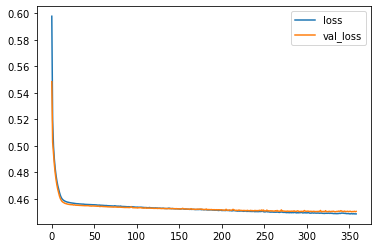

In [29]:
pd.DataFrame(nn_model_05.history.history).plot()

### d) Prediction and evaluation

* Let's look at the predictions for this model:

In [30]:
z_pred_05 = (nn_model_05.predict(X_Test) > 0.55).astype("int32")

* Let's look at the confusion matrix and classification report:

In [31]:
print(classification_report(y_true = y_Test, y_pred=z_pred_05))

              precision    recall  f1-score   support

           0       0.55      0.10      0.17      6990
           1       0.82      0.98      0.89     29040

    accuracy                           0.81     36030
   macro avg       0.69      0.54      0.53     36030
weighted avg       0.77      0.81      0.75     36030



In [32]:
print(confusion_matrix(y_true = y_Test, y_pred=z_pred_05))

[[  699  6291]
 [  569 28471]]


* **For reference:** Here are the number of ones in each y vector for the **first attempt**:

In [31]:
y_train.sum()

193979

In [33]:
y_val.sum()

95495

In [32]:
y_Test.sum()

28882

* Here are the number of ones in the "new" y vectors:

In [33]:
y_train.sum()

193908

In [34]:
y_val.sum()

95530

In [35]:
y_Test.sum()

29040

### Conclusion: 
Shuffling the data doesn't seem to impact the overall accuracy. There might be too many irrelevant parameters

## Model 06

* We'll drop some features and use 

### a) Data preprocessing

* We start by reviewing our features. In particular, we look at correlations with loan_status_int

In [37]:
df_lnclb_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status_int', 'term_int',
       'home_ownership_int', 'verification_status_int', 'purpose_int',
       'initial_list_status_int', 'application_type_int', 'emp_length_int'],
      dtype='object')

In [40]:
df_lnclb_data.corrwith(other=df_lnclb_data["loan_status_int"])

loan_amnt                 -0.059836
int_rate                  -0.247758
installment               -0.041082
annual_inc                 0.053432
dti                       -0.062413
open_acc                  -0.028012
pub_rec                   -0.019933
revol_bal                  0.010892
revol_util                -0.082341
total_acc                  0.017893
mort_acc                   0.068661
pub_rec_bankruptcies      -0.009416
loan_status_int            1.000000
term_int                  -0.173246
home_ownership_int         0.044559
verification_status_int   -0.077909
purpose_int                0.008974
initial_list_status_int   -0.009489
application_type_int      -0.006315
emp_length_int             0.013154
dtype: float64

* Following these numbers, let's drop the following:
            revol_bal                  0.010892
            total_acc                  0.017893
            pub_rec_bankruptcies      -0.009416
            purpose_int                0.008974
            initial_list_status_int   -0.009489
            application_type_int      -0.006315
            emp_length_int             0.013154

In [42]:
df_train_val = df_lnclb_data.drop(labels= ["revol_bal", "total_acc", "pub_rec_bankruptcies", "purpose_int", \
                                           "initial_list_status_int", "application_type_int","emp_length_int"],\
                                     axis =1 ).sample(n=360000, axis =0, random_state =101)

In [43]:
df_test = df_lnclb_data.drop(labels= ["revol_bal", "total_acc", "pub_rec_bankruptcies", "purpose_int", \
                                           "initial_list_status_int", "application_type_int","emp_length_int"],\
                            axis =1 ).sample(n=36030, axis =0, random_state =102)

* Here's the data with reduced number of features:

In [44]:
# Training and validation
X = df_train_val.drop(labels=["loan_status_int"], axis =1).values
y = df_train_val["loan_status_int"].values

# Test data
X_Test = df_test.drop(labels="loan_status_int", axis =1).values
y_Test = df_test["loan_status_int"].values

* Apply train_test_split:

In [45]:
[X_train, X_val, y_train, y_val] = train_test_split(X, y, test_size=0.33, random_state=101)

* Create the MinMaxScaler and fit to training data:

In [46]:
data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)

* Scale the validation and test data:

In [47]:
X_val = data_scaler.transform(X_val)
X_Test = data_scaler.transform(X_Test)

In [48]:
X_train.shape

(241200, 12)

In [49]:
X_val.shape

(118800, 12)

In [50]:
X_Test.shape

(36030, 12)

### b) Model construction and callback

* I'll try with a network that 

In [53]:
# Instantiate Sequential
nn_model_06 = Sequential()

# Input Layer
nn_model_06.add(Dense(units = 12, activation = "relu"))

# Hidden layers
nn_model_06.add(Dense(units = 25, activation = "relu"))

nn_model_06.add(Dense(units = 10, activation = "relu"))

nn_model_06.add(Dense(units = 5, activation = "relu"))

# Output layer with sigmoid activation
nn_model_06.add(Dense(units = 1, activation = "sigmoid"))

# Compile model:
nn_model_06.compile(optimizer = "adam", loss = "binary_crossentropy")

* Create EarlyStop. I've changed the patience from 50 to 25.

In [54]:
early_stop_06 = EarlyStopping(monitor='val_loss', patience=25, mode="min", verbose=1)

### c) Training

* I'll skip the board for this  model:

In [55]:
nn_model_06.fit(x = X_train, y=y_train, \
                validation_data=(X_val, y_val),\
                batch_size = 16384, validation_batch_size = 16384,
                epochs = 1500, \
                callbacks=[early_stop_06],\
                verbose=1)

Epoch 1/1500
15/15 [==============================] - 1s 21ms/step - loss: 0.6895 - val_loss: 0.6768
Epoch 2/1500
15/15 [==============================] - 0s 11ms/step - loss: 0.6628 - val_loss: 0.6455
Epoch 3/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.6292 - val_loss: 0.6087
Epoch 4/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.5896 - val_loss: 0.5669
Epoch 5/1500
15/15 [==============================] - 0s 11ms/step - loss: 0.5491 - val_loss: 0.5318
Epoch 6/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.5233 - val_loss: 0.5169
Epoch 7/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.5134 - val_loss: 0.5099
Epoch 8/1500
15/15 [==============================] - 0s 11ms/step - loss: 0.5066 - val_loss: 0.5031
Epoch 9/1500
15/15 [==============================] - 0s 11ms/step - loss: 0.5000 - val_loss: 0.4966
Epoch 10/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4938 - val_lo

Epoch 161/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4542 - val_loss: 0.4528
Epoch 162/1500
15/15 [==============================] - 0s 14ms/step - loss: 0.4542 - val_loss: 0.4531
Epoch 163/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4543 - val_loss: 0.4528
Epoch 164/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4544 - val_loss: 0.4530
Epoch 165/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4542 - val_loss: 0.4528
Epoch 166/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4542 - val_loss: 0.4528
Epoch 167/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4541 - val_loss: 0.4527
Epoch 168/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4541 - val_loss: 0.4527
Epoch 169/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4541 - val_loss: 0.4526
Epoch 170/1500
15/15 [==============================] - 0s 12ms/step - lo

15/15 [==============================] - 0s 14ms/step - loss: 0.4518 - val_loss: 0.4509
Epoch 320/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4518 - val_loss: 0.4509
Epoch 321/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4519 - val_loss: 0.4507
Epoch 322/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4519 - val_loss: 0.4507
Epoch 323/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4517 - val_loss: 0.4510
Epoch 324/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4518 - val_loss: 0.4509
Epoch 325/1500
15/15 [==============================] - 0s 11ms/step - loss: 0.4520 - val_loss: 0.4507
Epoch 326/1500
15/15 [==============================] - 0s 14ms/step - loss: 0.4518 - val_loss: 0.4507
Epoch 327/1500
15/15 [==============================] - 0s 13ms/step - loss: 0.4517 - val_loss: 0.4512
Epoch 328/1500
15/15 [==============================] - 0s 12ms/step - loss: 0.4519 - va

<AxesSubplot:>

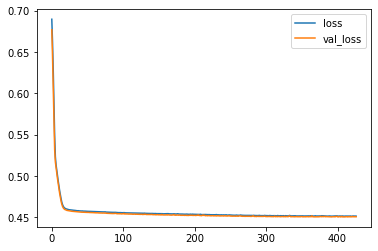

In [56]:
pd.DataFrame(nn_model_06.history.history).plot()

### d) Prediction and evaluation

* Let's look at the predictions for this model:

In [68]:
z_pred_06 = (nn_model_06.predict(X_Test) > 0.55).astype("int32")

* Let's look at the confusion matrix and classification report:

In [69]:
print(classification_report(y_true = y_Test, y_pred=z_pred_06))

              precision    recall  f1-score   support

           0       0.52      0.10      0.16      6990
           1       0.82      0.98      0.89     29040

    accuracy                           0.81     36030
   macro avg       0.67      0.54      0.53     36030
weighted avg       0.76      0.81      0.75     36030



In [70]:
print(confusion_matrix(y_true = y_Test, y_pred=z_pred_06))

[[  666  6324]
 [  612 28428]]


### Conclusions 
* I seem to be missing something fundamental here. This doesn't change the performance, which is the same as just taking a logistic regression. See below.
* For reference, Portilla gets 97% accuracy on defaults and 88% on paying.
* Portilla used dummy variables in the data, and got 78 features in the end.
* Note that 80% of the data is customers that have repaid their loan, so the 82% accuracy doesn't mean much. Furthermore, the F1-score is rather poor on my models.
* I'll go back to fixing the data. It seems like the issue comes from the categorical data.

## Test with logistic regression

I'll test this with a logistic regression model.
It apparently doesn't converge, and it gives very similar results to the above.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log_reg = LogisticRegression()

In [73]:
log_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
z_pred_lg = log_reg.predict(X_Test)

In [76]:
print(classification_report(y_true = y_Test, y_pred=z_pred_lg))

              precision    recall  f1-score   support

           0       0.51      0.06      0.10      6990
           1       0.81      0.99      0.89     29040

    accuracy                           0.81     36030
   macro avg       0.66      0.52      0.50     36030
weighted avg       0.75      0.81      0.74     36030



In [77]:
print(confusion_matrix(y_true = y_Test, y_pred=z_pred_lg))

[[  385  6605]
 [  368 28672]]


_____________________________________________

## Model 07

* Here I'm building another model with more features. I'm using the second data set that I made (35 features, 21/09/09).
* It seems that the model got even worse with these additions (21/09/09 18:06).

### a) Data preprocessing


* Here's the data with reduced number of features:

In [16]:
# Training and validation
X = df_train_val.drop(labels=["loan_status_int"], axis =1).values
y = df_train_val["loan_status_int"].values

# Test data
X_Test = df_test.drop(labels="loan_status_int", axis =1).values
y_Test = df_test["loan_status_int"].values

* Apply train_test_split:

In [17]:
[X_train, X_val, y_train, y_val] = train_test_split(X, y, test_size=0.33, random_state=101)

* Create the MinMaxScaler and fit to training data:

In [18]:
data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)

* Scale the validation and test data:

In [19]:
X_val = data_scaler.transform(X_val)
X_Test = data_scaler.transform(X_Test)

In [20]:
X_train.shape

(241200, 34)

In [21]:
X_val.shape

(118800, 34)

In [22]:
X_Test.shape

(35219, 34)

### b) Model construction and callback

* This time we have many more features

In [30]:
# Instantiate Sequential
nn_model_07 = Sequential()

# Input Layer
nn_model_07.add(Dense(units = 34, activation = "relu"))
nn_model_07.add(Dropout(rate = 0.2))

# Hidden layers
nn_model_07.add(Dense(units = 68, activation = "relu"))
nn_model_07.add(Dropout(rate = 0.2))

nn_model_07.add(Dense(units = 34, activation = "relu"))
nn_model_07.add(Dropout(rate = 0.2))

nn_model_07.add(Dense(units = 17, activation = "relu"))
nn_model_07.add(Dropout(rate = 0.2))

# Output layer with sigmoid activation
nn_model_07.add(Dense(units = 1, activation = "sigmoid"))

# Compile model:
nn_model_07.compile(optimizer = "adam", loss = "binary_crossentropy")

* Create EarlyStop. I've changed the patience from 50 to 25.

In [31]:
early_stop_07 = EarlyStopping(monitor='val_loss', patience=25, mode="min", verbose=1)

### c) Training

* I'll skip the board for this  model:

In [32]:
nn_model_07.fit(x = X_train, y=y_train, \
                validation_data=(X_val, y_val),\
                batch_size = 16384, validation_batch_size = 16384,
                epochs = 1500, \
                callbacks=[early_stop_07],\
                verbose=1)

Epoch 1/1500
15/15 [==============================] - 2s 78ms/step - loss: 0.6331 - val_loss: 0.5593
Epoch 2/1500
15/15 [==============================] - 1s 67ms/step - loss: 0.5362 - val_loss: 0.5028
Epoch 3/1500
15/15 [==============================] - 1s 65ms/step - loss: 0.5170 - val_loss: 0.4933
Epoch 4/1500
15/15 [==============================] - 1s 66ms/step - loss: 0.5033 - val_loss: 0.4797
Epoch 5/1500
15/15 [==============================] - 1s 68ms/step - loss: 0.4957 - val_loss: 0.4755
Epoch 6/1500
15/15 [==============================] - 1s 77ms/step - loss: 0.4893 - val_loss: 0.4716
Epoch 7/1500
15/15 [==============================] - 1s 72ms/step - loss: 0.4851 - val_loss: 0.4685
Epoch 8/1500
15/15 [==============================] - 1s 73ms/step - loss: 0.4818 - val_loss: 0.4668
Epoch 9/1500
15/15 [==============================] - ETA: 0s - loss: 0.4794- ETA: 0s - loss: - 1s 72ms/step - loss: 0.4792 - val_loss: 0.4637
Epoch 10/1500
15/15 [============================

Epoch 81/1500
15/15 [==============================] - 1s 81ms/step - loss: 0.4595 - val_loss: 0.4546
Epoch 82/1500
15/15 [==============================] - 1s 74ms/step - loss: 0.4598 - val_loss: 0.4546
Epoch 83/1500
15/15 [==============================] - 1s 74ms/step - loss: 0.4596 - val_loss: 0.4543
Epoch 84/1500
15/15 [==============================] - 1s 75ms/step - loss: 0.4593 - val_loss: 0.4543
Epoch 85/1500
15/15 [==============================] - 1s 75ms/step - loss: 0.4595 - val_loss: 0.4543
Epoch 86/1500
15/15 [==============================] - 1s 74ms/step - loss: 0.4592 - val_loss: 0.4537
Epoch 87/1500
15/15 [==============================] - 1s 74ms/step - loss: 0.4592 - val_loss: 0.4540
Epoch 88/1500
15/15 [==============================] - 1s 79ms/step - loss: 0.4593 - val_loss: 0.4537
Epoch 89/1500
15/15 [==============================] - 1s 75ms/step - loss: 0.4595 - val_loss: 0.4540
Epoch 90/1500
15/15 [==============================] - 1s 76ms/step - loss: 0.4593

15/15 [==============================] - 1s 75ms/step - loss: 0.4565 - val_loss: 0.4535
Epoch 161/1500
15/15 [==============================] - 1s 76ms/step - loss: 0.4566 - val_loss: 0.4534
Epoch 162/1500
15/15 [==============================] - 1s 74ms/step - loss: 0.4561 - val_loss: 0.4535
Epoch 00162: early stopping


<AxesSubplot:>

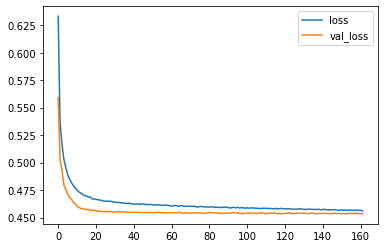

In [33]:
pd.DataFrame(nn_model_07.history.history).plot()

### d) Prediction and evaluation

* Let's look at the predictions for this model:

In [34]:
z_pred_07 = (nn_model_07.predict(X_Test) > 0.5).astype("int32")

* Let's look at the confusion matrix and classification report:

In [35]:
print(classification_report(y_true = y_Test, y_pred=z_pred_07))

              precision    recall  f1-score   support

           0       0.62      0.01      0.02      6978
           1       0.80      1.00      0.89     28241

    accuracy                           0.80     35219
   macro avg       0.71      0.51      0.46     35219
weighted avg       0.77      0.80      0.72     35219



In [36]:
print(confusion_matrix(y_true = y_Test, y_pred=z_pred_07))

[[   88  6890]
 [   53 28188]]
